In [14]:
import pandas as pd
import numpy as np

In [15]:
data = pd.read_csv('../data/crc_combined.csv')
data_mut = pd.read_csv('../data/crc_mut.csv')
data_cna = pd.read_csv('../data/crc_cna.csv')
data_clin = pd.read_csv('../data/crc_clin.csv')
data_out = pd.read_csv('../data/crc_out.csv')


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
data['out_os'].value_counts()
data_clin.head()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = data_clin.columns
cat_cols.drop('clin_Year of Birth')
for i in cat_cols:
    data_clin[i] = le.fit_transform(data_clin[i])
    data[i] = data_clin[i]


In [20]:
scores_df = pd.DataFrame(columns=['comb', 'mut', 'clin', 'cna'], index=['os', 'pfs'])
rf = RandomForestClassifier()
i = 'os'
comb_scores = cross_val_score(rf, data.drop('out_os', axis=1), data['out_os'], cv=5, scoring='roc_auc')
mut_scores = cross_val_score(rf, data_mut, data['out_os'], cv=5, scoring='roc_auc')
clin_scores = cross_val_score(rf, data_clin, data['out_os'], cv=5, scoring='roc_auc')
cna_scores = cross_val_score(rf, data_cna, data['out_os'], cv=5, scoring='roc_auc')
comb_mean = comb_scores.mean()
comb_95ci = 1.96*comb_scores.std()/np.sqrt(5)
mut_mean = mut_scores.mean()
mut_95ci = 1.96*mut_scores.std()/np.sqrt(5)
clin_mean = clin_scores.mean()
clin_95ci = 1.96*clin_scores.std()/np.sqrt(5)
cna_mean = cna_scores.mean()
cna_95ci = 1.96*cna_scores.std()/np.sqrt(5)
scores_df.loc[i, 'comb'] = str(round(comb_mean, 3)) + ' +/- ' + str(round(comb_95ci, 3))
scores_df.loc[i, 'mut'] = str(round(mut_mean, 3)) + ' +/- ' + str(round(mut_95ci, 3))
scores_df.loc[i, 'clin'] = str(round(clin_mean, 3)) + ' +/- ' + str(round(clin_95ci, 3))
scores_df.loc[i, 'cna'] = str(round(cna_mean, 3)) + ' +/- ' + str(round(cna_95ci, 3))
scores_df


,comb,mut,clin,cna
os,0.783 +/- 0.015,0.563 +/- 0.025,0.653 +/- 0.031,0.575 +/- 0.02
pfs,NaN,NaN,NaN,NaN


In [21]:
i = 'pfs'
comb_scores = cross_val_score(rf, data.drop('out_pfs', axis=1), data['out_pfs'], cv=5, scoring='roc_auc')
mut_scores = cross_val_score(rf, data_mut, data['out_pfs'], cv=5, scoring='roc_auc')
clin_scores = cross_val_score(rf, data_clin, data['out_pfs'], cv=5, scoring='roc_auc')
cna_scores = cross_val_score(rf, data_cna, data['out_pfs'], cv=5, scoring='roc_auc')
comb_mean = comb_scores.mean()
comb_95ci = 1.96*comb_scores.std()/np.sqrt(5)
mut_mean = mut_scores.mean()
mut_95ci = 1.96*mut_scores.std()/np.sqrt(5)
clin_mean = clin_scores.mean()
clin_95ci = 1.96*clin_scores.std()/np.sqrt(5)
cna_mean = cna_scores.mean()
cna_95ci = 1.96*cna_scores.std()/np.sqrt(5)
scores_df.loc[i, 'comb'] = str(round(comb_mean, 3)) + ' +/- ' + str(round(comb_95ci, 3))
scores_df.loc[i, 'mut'] = str(round(mut_mean, 3)) + ' +/- ' + str(round(mut_95ci, 3))
scores_df.loc[i, 'clin'] = str(round(clin_mean, 3)) + ' +/- ' + str(round(clin_95ci, 3))
scores_df.loc[i, 'cna'] = str(round(cna_mean, 3)) + ' +/- ' + str(round(cna_95ci, 3))
scores_df

,comb,mut,clin,cna
os,0.783 +/- 0.015,0.563 +/- 0.025,0.653 +/- 0.031,0.575 +/- 0.02
pfs,0.709 +/- 0.022,0.532 +/- 0.019,0.545 +/- 0.034,0.499 +/- 0.024


In [22]:
from sklearn.model_selection import train_test_split
X = data.drop(['out_os', 'out_pfs'], axis=1)
y = data['out_os']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

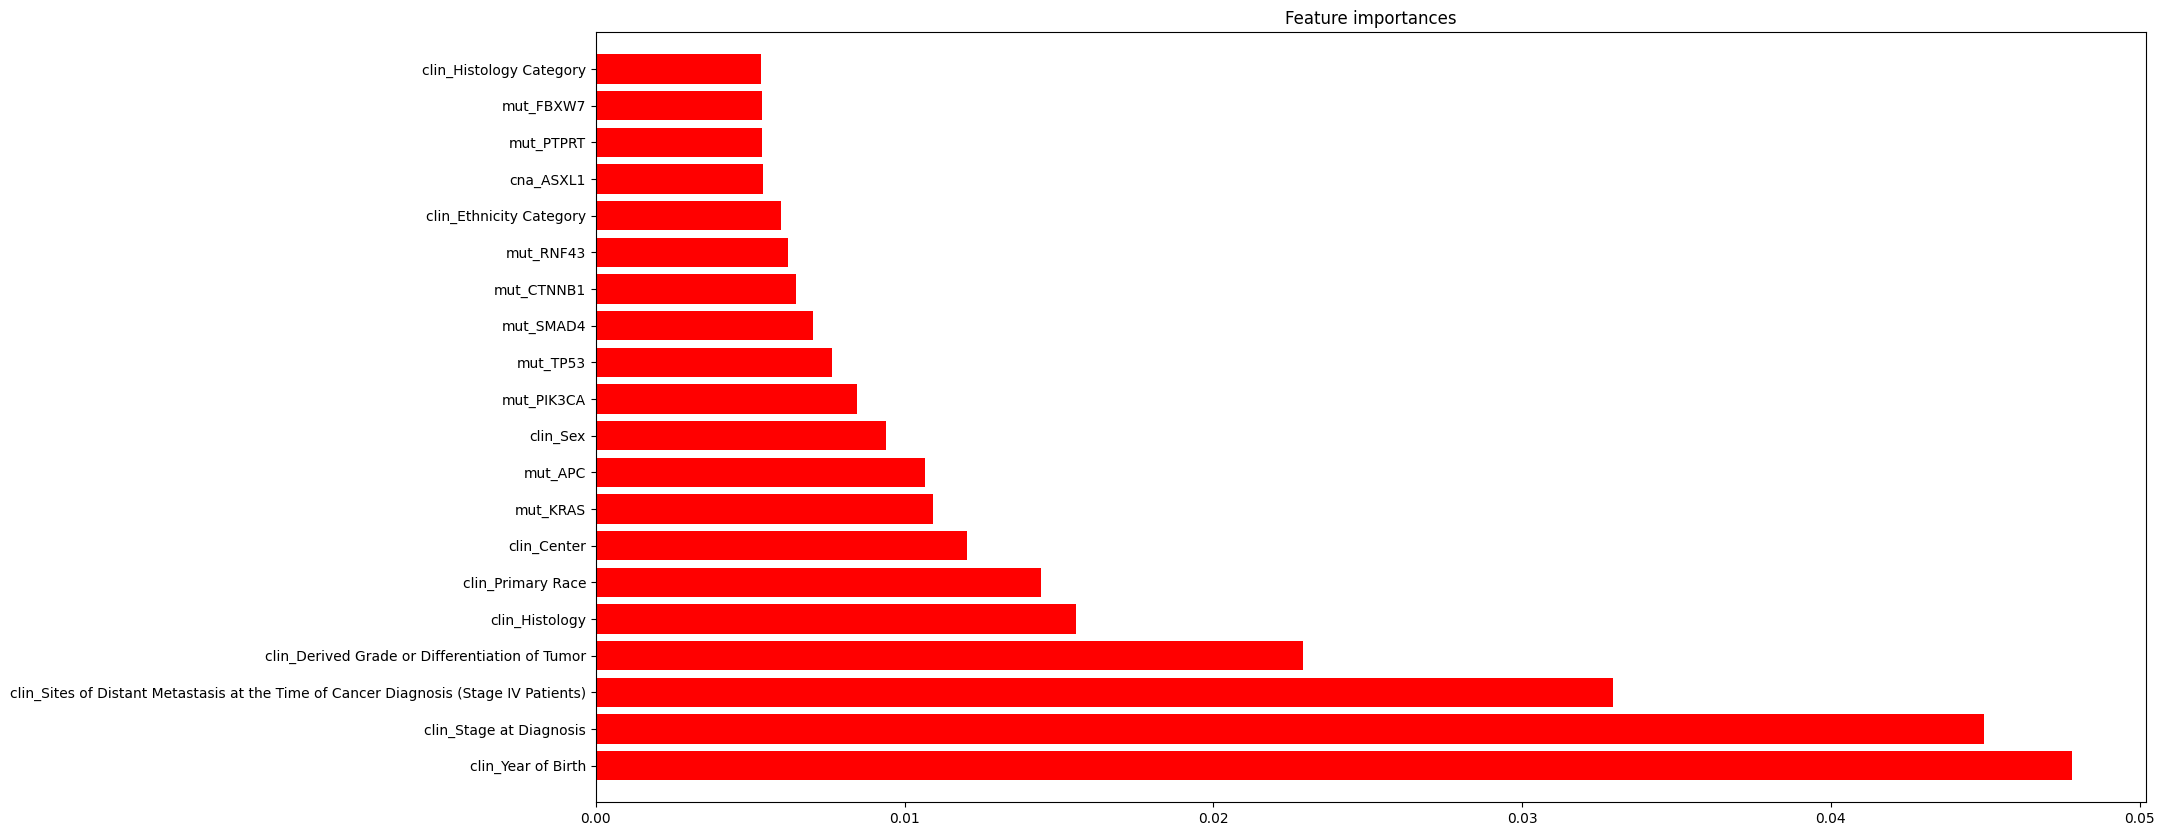

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
#get top 20 feature importances and plot as a horizontal bar chart
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.barh(range(20), importances[indices][:20], color="r", align="center")
plt.yticks(range(20), X.columns[indices][:20])
plt.ylim([-1, 20])
plt.savefig('../results/feature_importances.png')



[Text(0.625, 0.9, 'mut_JAK1 <= 0.5\ngini = 0.488\nsamples = 692\nvalue = [458, 624]'),
 Text(0.4166666666666667, 0.7, 'mut_STAT5B <= 0.5\ngini = 0.491\nsamples = 674\nvalue = [456, 601]'),
 Text(0.3333333333333333, 0.5, 'mut_FANCA <= 0.5\ngini = 0.491\nsamples = 667\nvalue = [456, 593]'),
 Text(0.16666666666666666, 0.3, 'mut_ALK <= 0.5\ngini = 0.494\nsamples = 640\nvalue = [447, 562]'),
 Text(0.08333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.3, 'cna_MPL <= -0.5\ngini = 0.349\nsamples = 27\nvalue = [9, 31]'),
 Text(0.4166666666666667, 0.1, '\n  (...)  \n'),
 Text(0.5833333333333334, 0.1, '\n  (...)  \n'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [0, 8]'),
 Text(0.8333333333333334, 0.7, 'cna_FANCA <= 0.5\ngini = 0.147\nsamples = 18\nvalue = [2, 23]'),
 Text(0.75, 0.5, 'clin_Center <= 1.5\ngini = 0.08\nsamples = 17\nvalue = [1, 23]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 22]'),
 Text(0.8333333333333334, 0.

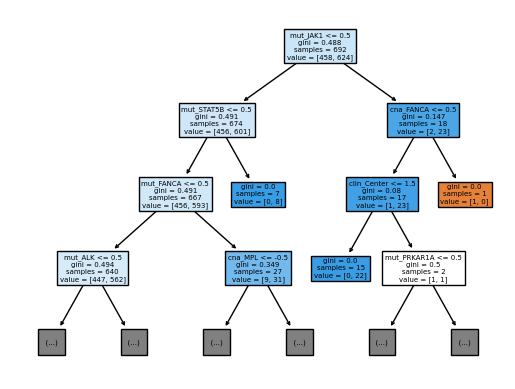

In [30]:
#get the first decision tree from the random forest
from sklearn import tree
tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)

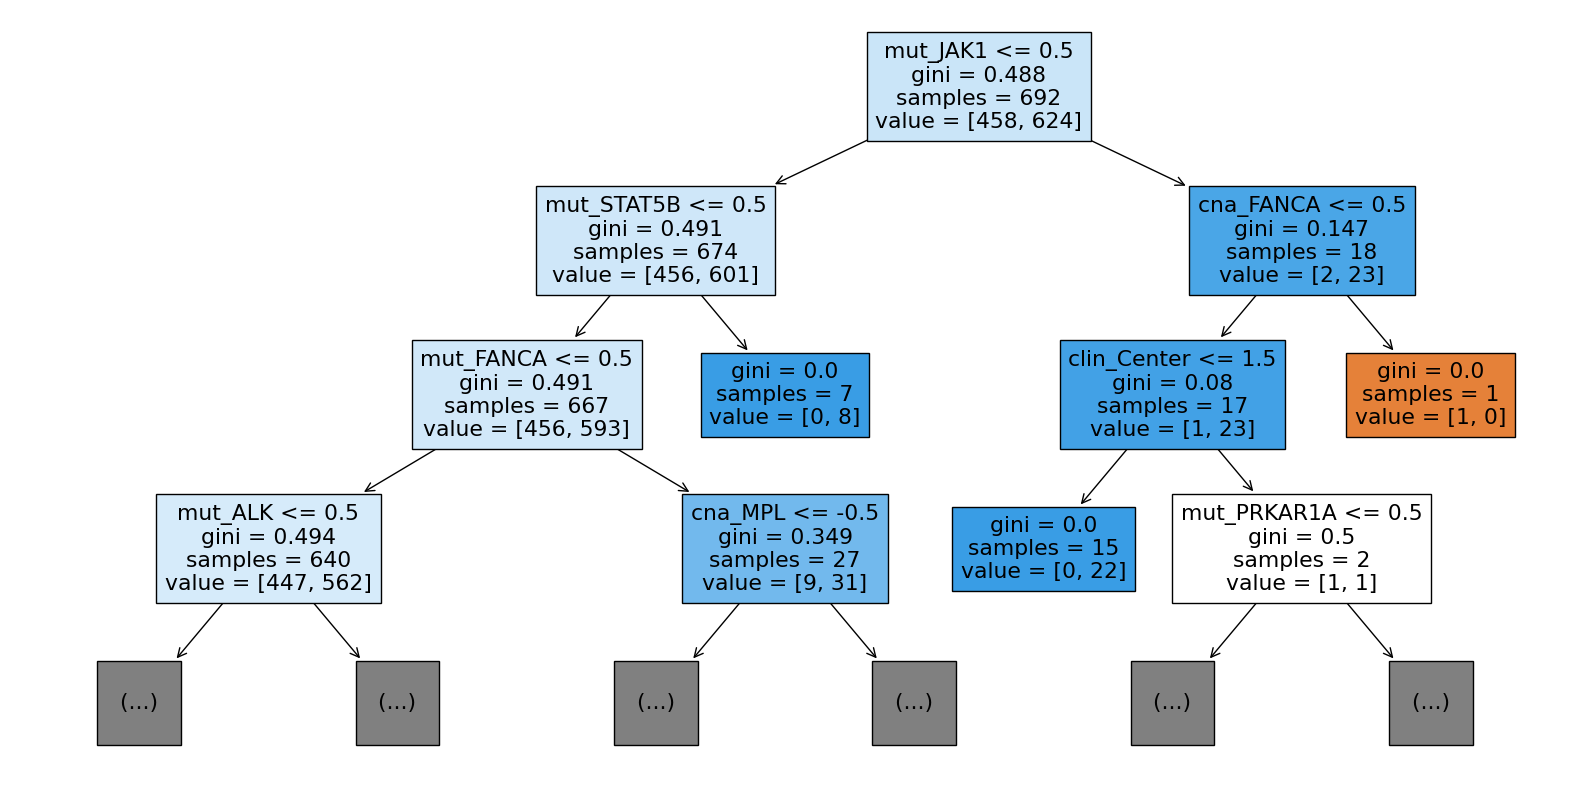

In [31]:
#make it bigger and save it
plt.figure(figsize=(20,10))
tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)
plt.savefig('../results/tree.png', dpi=300)